Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
Simple Linear Regression Evaluation:
  MSE:  0.7091
  RMSE: 0.8421
  R²:   0.4589

Multiple Linear Regression Evaluation:
  MSE:  0.5559
  RMSE: 0.7456
  R²:   0.5758



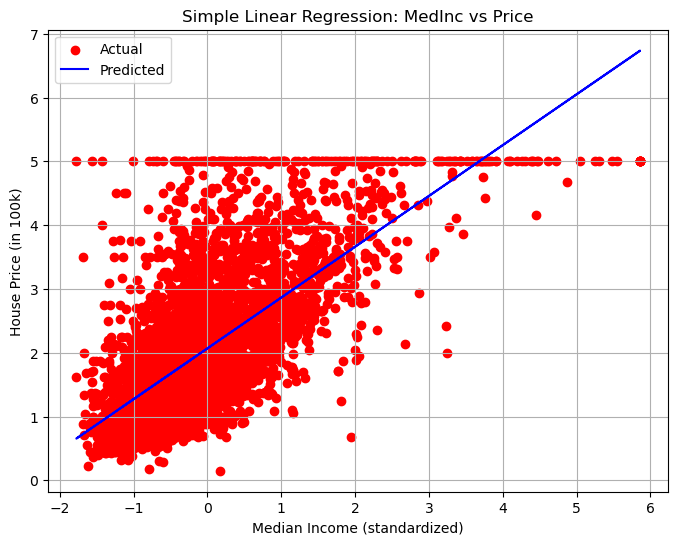

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Rename target for clarity
df.rename(columns={'MedHouseVal': 'Price'}, inplace=True)

# a. Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Price', axis=1))
X_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Price']

# b. Simple Linear Regression (MedInc vs Price)
X_simple = X_scaled[['MedInc']]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_s = simple_model.predict(X_test_s)

# c. Multiple Linear Regression (All features vs Price)
X_multiple = X_scaled
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

multiple_model = LinearRegression()
multiple_model.fit(X_train_m, y_train_m)
y_pred_m = multiple_model.predict(X_test_m)

# d. Evaluation Metrics
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    print()

evaluate(y_test_s, y_pred_s, "Simple Linear Regression")
evaluate(y_test_m, y_pred_m, "Multiple Linear Regression")

# e. Visualization - Simple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='red', label='Actual')
plt.plot(X_test_s, y_pred_s, color='blue', label='Predicted')
plt.title('Simple Linear Regression: MedInc vs Price')
plt.xlabel('Median Income (standardized)')
plt.ylabel('House Price (in 100k)')
plt.legend()
plt.grid(True)
plt.show()




✅ Final Optimized Model Metrics:
MSE:  0.2480
RMSE: 0.4980
R²:   0.8107


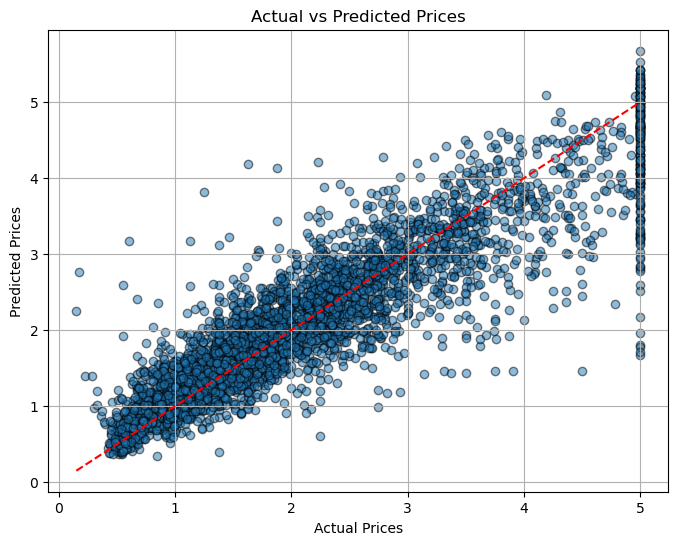

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset
housing = fetch_california_housing(as_frame=True)
X = housing.frame.drop(columns='MedHouseVal')
y = housing.frame['MedHouseVal']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),                    # Handle missing values
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),     # Feature engineering
    ('scaler', StandardScaler()),                                   # Normalize
    ('feature_select', SelectKBest(score_func=f_regression, k=30)), # Select top 30 features
    ('model', GradientBoostingRegressor(n_estimators=300, max_depth=4, learning_rate=0.05, random_state=42))
])

# 4. Fit model
pipeline.fit(X_train, y_train)

# 5. Predict
y_pred = pipeline.predict(X_test)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Final Optimized Model Metrics:")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# 7. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()



📊 Simple Linear Regression (Using 'MedInc'):
MSE:  0.7091
RMSE: 0.8421
R²:   0.4589

📊 Multiple Linear Regression (All Features with Polynomial + Selection):
MSE:  0.4660
RMSE: 0.6827
R²:   0.6444


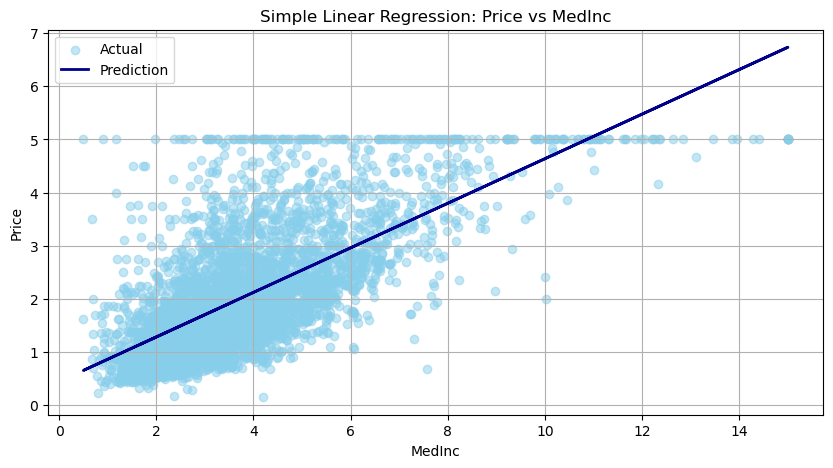

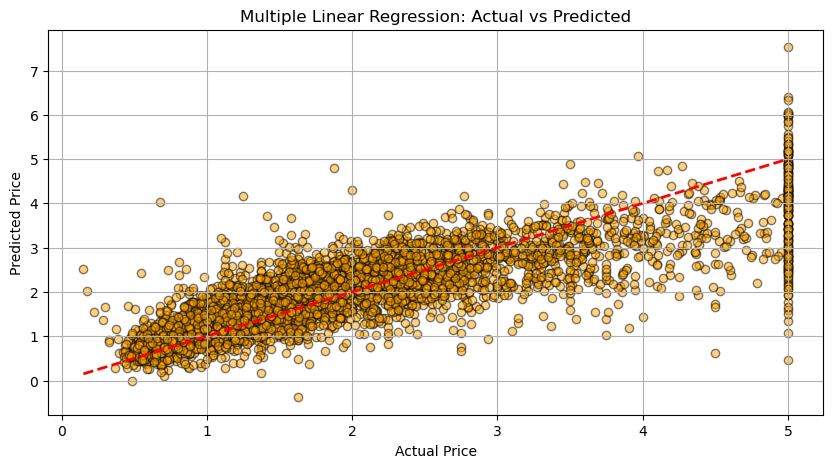

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()
df.rename(columns={'MedHouseVal': 'Price'}, inplace=True)

# Select feature for simple regression
simple_feature = 'MedInc'
X_simple = df[[simple_feature]]
y = df['Price']

# Select features for multiple regression
X_multiple = df.drop(columns=['Price'])

# Split datasets
X_simple_train, X_simple_test, y_simple_train, y_simple_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_multiple_train, X_multiple_test, y_multiple_train, y_multiple_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Simple Linear Regression Pipeline
simple_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
simple_pipeline.fit(X_simple_train, y_simple_train)
y_simple_pred = simple_pipeline.predict(X_simple_test)

# Multiple Linear Regression Pipeline with Feature Engineering
multiple_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_regression, k=30)),
    ('regressor', LinearRegression())
])
multiple_pipeline.fit(X_multiple_train, y_multiple_train)
y_multiple_pred = multiple_pipeline.predict(X_multiple_test)

# Evaluation: Simple
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_simple_test, y_simple_pred)

# Evaluation: Multiple
mse_multiple = mean_squared_error(y_multiple_test, y_multiple_pred)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_multiple_test, y_multiple_pred)

# Print results
print("\n📊 Simple Linear Regression (Using 'MedInc'):")
print(f"MSE:  {mse_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")
print(f"R²:   {r2_simple:.4f}")

print("\n📊 Multiple Linear Regression (All Features with Polynomial + Selection):")
print(f"MSE:  {mse_multiple:.4f}")
print(f"RMSE: {rmse_multiple:.4f}")
print(f"R²:   {r2_multiple:.4f}")

# Visualization: Simple Regression
plt.figure(figsize=(10, 5))
plt.scatter(X_simple_test, y_simple_test, color='skyblue', label='Actual', alpha=0.5)
plt.plot(X_simple_test, y_simple_pred, color='darkblue', linewidth=2, label='Prediction')
plt.xlabel(simple_feature)
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs ' + simple_feature)
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Multiple Regression
plt.figure(figsize=(10, 5))
plt.scatter(y_multiple_test, y_multiple_pred, alpha=0.5, color='orange', edgecolor='k')
plt.plot([y_multiple_test.min(), y_multiple_test.max()],
         [y_multiple_test.min(), y_multiple_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

